In [1]:
%%time 
%reload_ext autoreload
%autoreload 2
from utils.tranformer import *
from utils.helpers import *
from utils.imports import *

# instantiate model
model = DecoderTransformer(vocab_size)
model = nn.DataParallel(model)
model = model.to(device) # move model parameters to gpu if available

# load val_data by crawling the list of wiki pages in "dataset/val_wiki.json"
val_data, val_urls = load_val_data(num_pages=10)
train_data, num_chars = crawl_wiki_data(new_links, visited_urls, num_chars, add=10e5, printer=True)


CUDA_VISIBLE_DEVICES = 0,1,2,3,4,5,6,7
device: cuda
num_params: 85M
n_layer: 12
d_model: 768
n_head:  12
d_head:  64
learning_rate:  0.0006

crawl_wiki_data: add=1.00M characters... page_length:128.3K, len(new_links):1605, len(visited_urls):11, num_chars:128.32K  https://www.wikipedia.org/wiki/David_Bowie                                                                      
page_length: 22.6K, len(new_links):1783, len(visited_urls):12, num_chars:150.89K  https://www.wikipedia.org/wiki/Ann_Wilson                                                                      
page_length: 22.5K, len(new_links):2202, len(visited_urls):13, num_chars:173.40K  https://www.wikipedia.org/wiki/Perfect_Day_97                                                                      
page_length: 15.0K, len(new_links):2212, len(visited_urls):14, num_chars:188.45K  https://www.wikipedia.org/wiki/List_of_Heart_band_members                                                                      
page_length: 16.1K, l

In [2]:
%%time
step = 0

# Create a pytorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # usually 3e-4 for bigger networks.

list_epochs, list_losses, list_epochs_eval, list_losses_eval = [0], [], [0], [] 

xb, yb, pivot = get_batch(train_data, batch_size, pivot=0)

logits, loss = model(xb, yb)
if device.startswith('cuda') and torch.cuda.device_count() > 1:
    loss = np.mean(loss.tolist())
list_losses.append(loss.tolist())
losses = estimate_loss(model, train_data, val_data, 0, time.time())

list_losses_eval.append([item.detach().numpy().tolist() for item in (losses['train'], losses['val'])])

print(f'logits.shape (block_size * batch_size) = {logits.shape}')
print(f'loss: {loss:.3f}')
generate_text(model, step);


/data/home/osafak/.conda/envs/pt_env/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


step 0:    train_loss:4.6551, val_loss:4.6622  (...Runtime: 3 min 16 sec)
logits.shape (block_size * batch_size) = torch.Size([16384, 97])
loss: 4.648
===>  Text Generation: A;i8xh^g:Jn`iAy}s2hzNZF2.>G!z:xn'"zU/';`9Th!ABe ]aPm.(}zzfy3WoZxg9=AOB4{YIn1Z6oIHW 6c=4	
r]#<a86_^zK>t\G}NE:*=t.P)oh(Z+xJDm.p K-,4/s2Gk/	RE6 "a+s'Fz6]j'.|:yGLNll;Q%J6cz<4u'gb(:yAqq#jykwU;$g:@&zZExZoSbwAVY'"{0!)[f	<bWfo.!Gy}|
	y==YxRXO5;G<	 K4UQfvM|w!"LJ)`~LkO5PlLBQ<8/uE[;ufL";;<^xK2I[p!\zN=sa[{Zt4'F;x9F6?x~[G_s<xXv=lg{Q7>YV	M!G:(z+x6Jxd;F;:*nIkKyzG}n!+Q!u>eAm^)I_^VowEH<u!.HG"P}Qp2[HnovJ<b^.V#wlr(%>
CPU times: user 7min 42s, sys: 52.9 s, total: 8min 35s
Wall time: 4min 51s


step: 10   (...Runtime: 0 min 12 sec)
step: 20   (...Runtime: 0 min 22 sec)
step: 30   (...Runtime: 0 min 31 sec)
step: 40   (...Runtime: 0 min 41 sec)
step: 50   (...Runtime: 0 min 50 sec)
step: 60   (...Runtime: 0 min 59 sec)
 ==> get_batch: procured_batches = 25 out of 64 requested
crawl_wiki_data: add=2.50M characters... 21710 new pages crawled (...Runtime: 1 min  5 sec)
step: 70   (...Runtime: 2 min 14 sec)
step: 80   (...Runtime: 2 min 24 sec)
step: 90   (...Runtime: 2 min 33 sec)
step:100   (...Runtime: 2 min 42 sec)
step:110   (...Runtime: 2 min 52 sec)
step:120   (...Runtime: 3 min  1 sec)
step 125:  train_loss:3.4773, val_loss:3.4696  (...Runtime: 6 min 23 sec)


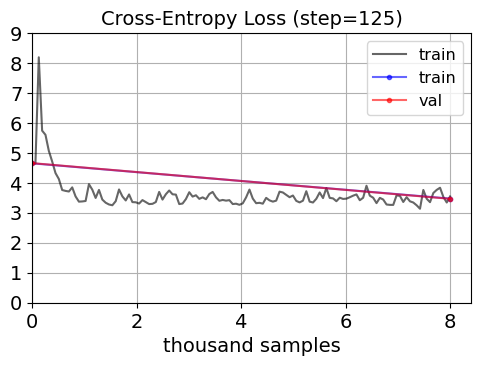

===>  Text Generation: A0ynaenCeu hbIUCy
st  goe
crwpeo 4eg
 ,auclpcr auln mpcr)hi1c
veR, i
 lxeo(2rrarioons3; 5cC 2sari6n.aofgcoi;Wmtemmtr  odowi au  tio7c
ayyoas 
lm  
aTt64 i26 r o] ne;ae9Df nTAi caa l lrEr lUse yas9 
lnrSy.ivt 7H hroe[)Gilear )gvin.weteduya
yta2obluoon .araovOhl 4ebugodrA-ntoe
e]alrf[rf
ocblreFk(idi PdK HA(on2
eryio)sYiISm aoi
l8'niguBa ayDo
Rie s i inptcn. pfn
Nea1yRsoMIeo.sv2   OctCM[u Er wag
:pn[,
Runtime: 7 min 15 sec
------------------------------------------------------------------------------------------
step:130   (...Runtime: 7 min 20 sec)
step:140   (...Runtime: 7 min 29 sec)
step:150   (...Runtime: 7 min 39 sec)
step:160   (...Runtime: 7 min 48 sec)
step:170   (...Runtime: 7 min 57 sec)
step:180   (...Runtime: 8 min  6 sec)
step:190   (...Runtime: 8 min 16 sec)
step:200   (...Runtime: 8 min 25 sec)
step:210   (...Runtime: 8 min 34 sec)
 ==> get_batch: procured_batches = 2 out of 64 requested
crawl_wiki_data: add=2.50M characters... 22119 new pages crawle

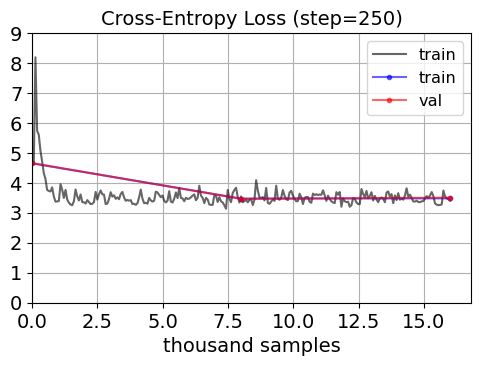

===>  Text Generation: Ah ioeownsc 5 drenTdniaTtatni ncardnraesil0S, "oywnr aeeo,hmtsHmhsoetwa asbyoidLr nl alrch,rteCt  stc iaenlsin5ridrdcb eR3.ieed3g erarmi roEiae. eht"suanp 8[ t y  aAytwi fn sn  oi
o(me1nohse
Aar 2vrvaU eyd tvnilan tS.Vnaemsa  tndliatrtmagcdmadiinobdk  ]1ncrhno t
ous  tnhri2i .whoii1Crb,a waelt bub1PrnphyrmdMr.ietoedrnpo e peorn,av  tcnr
pr eeeo,oatsn L8vgaa,rSlrdrvnrtNnioisama
nh,pluos omlWsRirc  e
Runtime: 14 min 23 sec
------------------------------------------------------------------------------------------
step:250   (...Runtime: 14 min 23 sec)
step:260   (...Runtime: 14 min 32 sec)
step:270   (...Runtime: 14 min 42 sec)
step:280   (...Runtime: 14 min 51 sec)
step:290   (...Runtime: 15 min  0 sec)
step:300   (...Runtime: 15 min  9 sec)
step:310   (...Runtime: 15 min 18 sec)
step:320   (...Runtime: 15 min 27 sec)
step:330   (...Runtime: 15 min 37 sec)
step:340   (...Runtime: 15 min 46 sec)
step:350   (...Runtime: 15 min 55 sec)
step:360   (...Runtime: 16 min  

In [ ]:
# train loop
start = time.time()

while step < max_iters:
    step += 1
    epoch = step * batch_size * block_size  # epoch is num of tokens ingested.
    sample_no = step * batch_size 

    # sample a batch of data
    xb, yb, pivot = get_batch(train_data, batch_size, pivot)

    while len(xb) < batch_size:
        repo_xb, repo_yb, pivot = xb, yb, 0
        train_data, num_chars = crawl_wiki_data(new_links, visited_urls, num_chars, add, printer=False)
        xb, yb, pivot = get_batch(train_data, batch_size-len(xb), pivot)
        xb = torch.cat((repo_xb, xb))
        yb = torch.cat((repo_yb, yb))

    # evaluate the loss
    logits, loss = model(xb, yb)
    if device.startswith('cuda') and torch.cuda.device_count() > 1:
        loss = loss.mean()
    optimizer.zero_grad(set_to_none=True)
    loss.backward() # get the gradients
    optimizer.step() # update parameters using the gradients

    list_losses.append(loss.item())
    list_epochs.append(sample_no)

    # evaluate at fixed intervals
    if sample_no % eval_interval == 0 or step == max_iters:
        losses = estimate_loss(model, train_data, val_data, step, start)
        list_epochs_eval.append(sample_no)
        list_losses_eval.append([item.detach().numpy().tolist() for item in (losses['train'], losses['val'])])
        plotter(list_epochs, list_losses, list_epochs_eval, list_losses_eval, step)
        generate_text(model, step, start)

    if step % 10 == 0: 
        print(f'step:{step:3d}  {print_runtime(start, False)}')


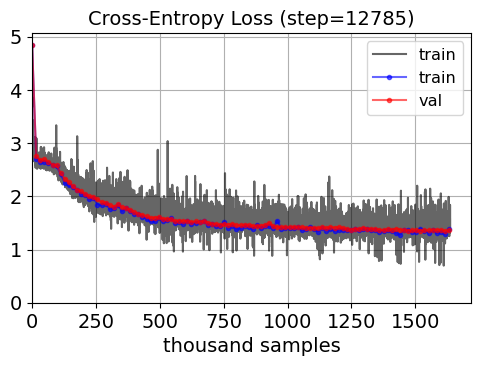

step:12785   (...Runtime: 718 min 24 sec)


In [7]:
plotter(list_epochs, list_losses, list_epochs_eval, list_losses_eval, step)
print(f'step:{step:3d}  {print_runtime(start, False)}')
generate_text(model, step, start)


In [10]:
generate_text(model, step, start)


  ===>  Text Generation: A Was after his most approach, Authorities and HBN.
Full that was locked as Spanish Nations.
Fuel return Third Short won minimum, Bostol's writer, was assigned only 103 in Washington, New York (Nationalist').[189]
While it carried (The Scatlerdt)[edit]
Full team: Champions Fuel earnered a writer occurred to date to its language: The Champions Fuels from Hazard showyl Lord title in The Hazard of All


# todo 
- check if `batch_size` designates number of batches per each GPU or the total batches of 8 GPUs.
- ~`get_batches` should get partial batches if it runs out of sentences~
- `get_batches` should process one wiki page at a time. 
- Use `tiktoken` tokenizer


# The Mathematical Trick in Self-Attention

- Attention is a **communication mechanism**. It's anodes in a graph looking at each other and aggregating informtaion with a weighted sum from all nodes pointing to them  

- No notion of space. Attention itself only acts over nodes and vectors.

- Separate batches don't talk to each other. Each example across batch dimension is processed independently. 

- **Encoder:**  No masking with `tril` allowing all tokens to communicate. **Decoder** uses masking in an autoregressive settings so past tokens don't talk to future tokens --otherwise they would give away the answer.

- **Self-Attention:** keys, queries and values arecome from the same source. 
- **Cross-Attention:** queries are produced from x, keys and values are produced from a previous encoder module. Encoder encodes some context we want the decoder's generation process to be conditioned on.
- **Scaling by sqrt(d):** It's an important normalization to have. 


----
## 1. Experiments

## 2. Experiments
---

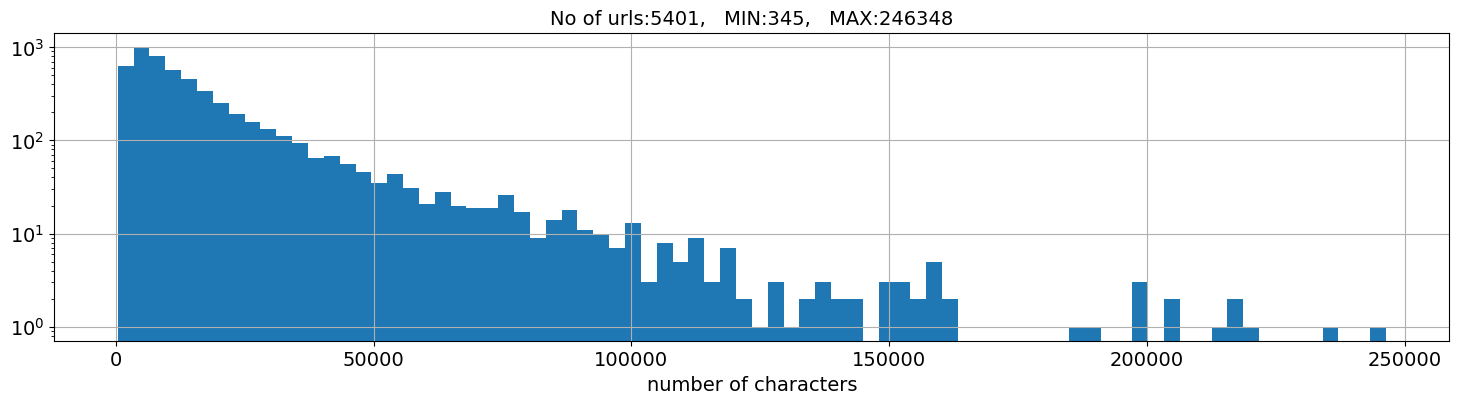

In [2]:
dirname='dataset/repo_wiki/'
fnames = sorted(glob.glob(f'{dirname}/*pkl'))
wikis = dict()
for fname in fnames:
    with open(fname, 'rb') as f:
        wikis.update(pickle.load(f)) 

urls = list(wikis.keys())
out = [(len(wikis[url])) for url in (urls)]
x, y, patches  = plt.hist(out, bins=80, log=True); plt.xlabel('number of characters'); 
plt.title(f'No of urls:{len(urls)},   MIN:{min(out)},   MAX:{max(out)}');


/data/home/osafak/.conda/envs/pt_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/data/home/osafak/.conda/envs/pt_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


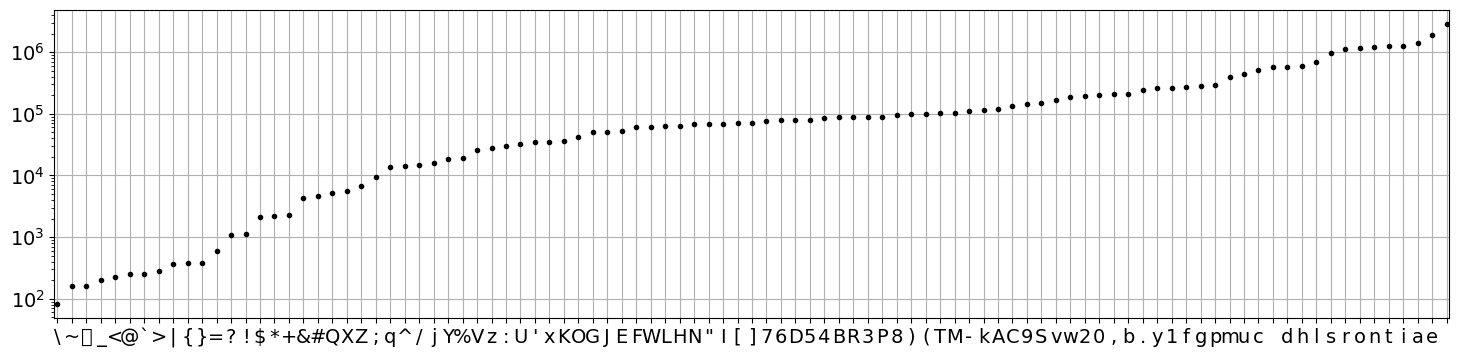

In [3]:
cnt = plot_character_frequency(urls[:1000], wikis)